<a href="https://colab.research.google.com/github/AyuBuradkar26/LGMVIP-DataScience/blob/main/task_2_Stock_Market_Prediction_And_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

           Open     Close      High       Low
Open   1.000000  0.997840  0.999015  0.998825
Close  0.997840  1.000000  0.999194  0.999119
High   0.999015  0.999194  1.000000  0.998773
Low    0.998825  0.999119  0.998773  1.000000


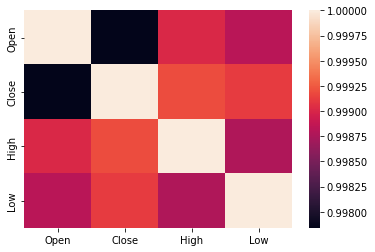

In [ ]:
import seaborn as sns
dfs=df[["Open","Close","High","Low"]]
CR=dfs.corr()
print(CR)
sns.heatmap(CR)

In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

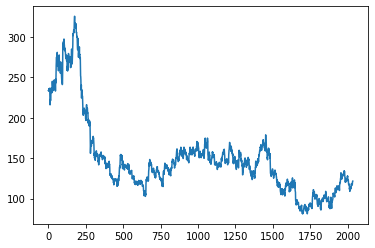

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [ ]:
import numpy as np

In [ ]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1322, 713)

In [ ]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.25347222],
       [0.26041667],
       [0.2563317 ]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(612, 100)
(612,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics = ['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
20/20 [==============================] - 4s 208ms/step - loss: 0.0014 - accuracy: 8.1900e-04 - val_loss: 8.1624e-04 - val_accuracy: 0.0016
Epoch 2/10
20/20 [==============================] - 4s 209ms/step - loss: 0.0012 - accuracy: 8.1900e-04 - val_loss: 7.4347e-04 - val_accuracy: 0.0016
Epoch 3/10
20/20 [==============================] - 4s 209ms/step - loss: 0.0013 - accuracy: 8.1900e-04 - val_loss: 0.0012 - val_accuracy: 0.0016
Epoch 4/10
20/20 [==============================] - 4s 206ms/step - loss: 0.0012 - accuracy: 8.1900e-04 - val_loss: 0.0011 - val_accuracy: 0.0016
Epoch 5/10
20/20 [==============================] - 4s 210ms/step - loss: 9.9985e-04 - accuracy: 8.1900e-04 - val_loss: 9.2281e-04 - val_accuracy: 0.0016
Epoch 6/10
20/20 [==============================] - 4s 205ms/step - loss: 9.3595e-04 - accuracy: 8.1900e-04 - val_loss: 7.2659e-04 - val_accuracy: 0.0016
Epoch 7/10
20/20 [==============================] - 4s 206ms/step - loss: 8.9676e-04 - accuracy: 8.1

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
ypred=test_predict.reshape(-1)
print(ypred[:10])
print(ytest[:10])

[0.34169948 0.34414494 0.3454546  0.3456869  0.34508687 0.34395856
 0.34256992 0.3413341  0.34066123 0.34066573]
[0.32271242 0.3247549  0.32148693 0.32352941 0.3255719  0.32638889
 0.33496732 0.34395425 0.3441585  0.34599673]


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

169.87873912237285

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

120.49707266004118

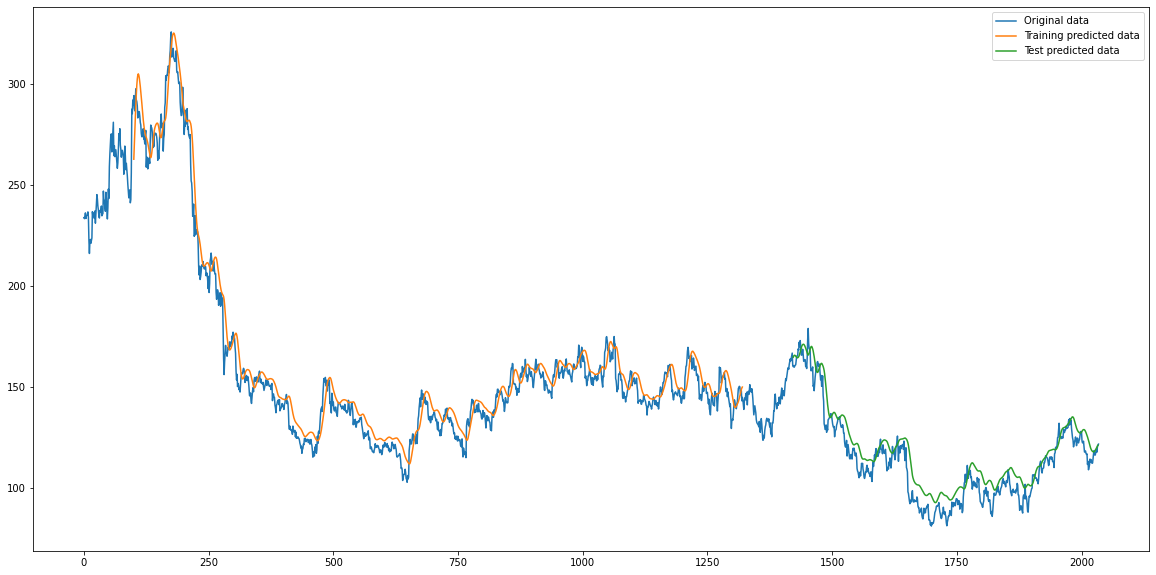

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(df1),label="Original data")
plt.plot(trainPredictPlot,label="Training predicted data")
plt.plot(testPredictPlot,label="Test predicted data")
plt.legend()
plt.show()

ValueError: ignored